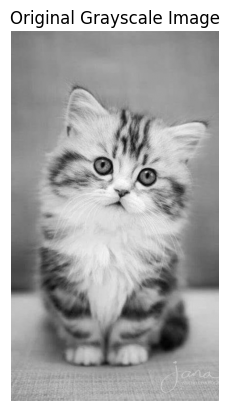

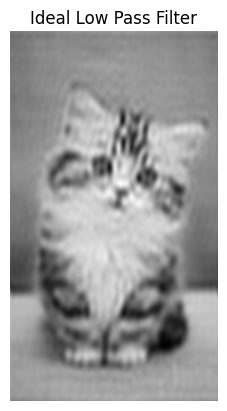

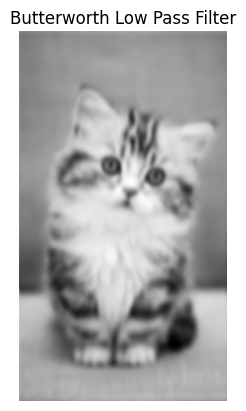

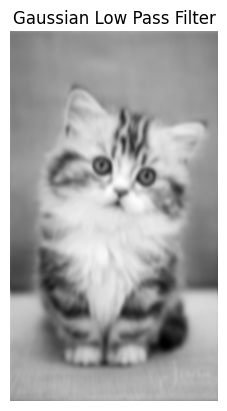

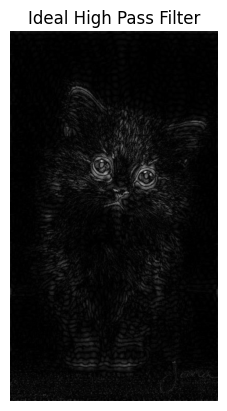

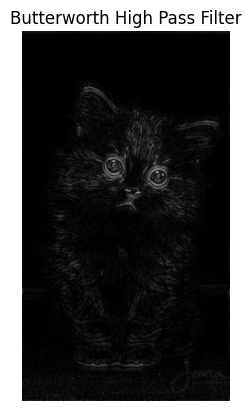

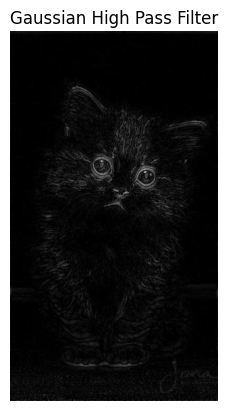

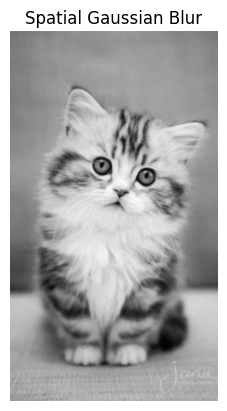

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_image(image_path):
    """Load the image and convert it to grayscale."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

def compute_fft(image):
    """Compute the 2D Fourier Transform of the image."""
    return np.fft.fftshift(np.fft.fft2(image))

def create_lpf_ideal(shape, cutoff):
    """Create an Ideal Low Pass Filter mask."""
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), cutoff, 1, thickness=-1)
    return mask

def create_lpf_butterworth(shape, cutoff, order=2):
    """Create a Butterworth Low Pass Filter mask."""
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x = np.arange(0, rows).reshape(rows, 1)
    y = np.arange(0, cols)
    d = np.sqrt((x - crow) ** 2 + (y - ccol) ** 2)
    mask = 1 / (1 + (d / cutoff) ** (2 * order))
    return mask

def create_lpf_gaussian(shape, cutoff):
    """Create a Gaussian Low Pass Filter mask."""
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x = np.arange(0, cols)
    y = np.arange(0, rows).reshape(rows, 1)
    d = np.sqrt((x - ccol) ** 2 + (y - crow) ** 2)
    mask = np.exp(-(d ** 2) / (2 * (cutoff ** 2)))
    return mask

def create_hpf_ideal(shape, cutoff):
    """Create an Ideal High Pass Filter mask."""
    return 1 - create_lpf_ideal(shape, cutoff)

def create_hpf_butterworth(shape, cutoff, order=2):
    """Create a Butterworth High Pass Filter mask."""
    return 1 - create_lpf_butterworth(shape, cutoff, order)

def create_hpf_gaussian(shape, cutoff):
    """Create a Gaussian High Pass Filter mask."""
    return 1 - create_lpf_gaussian(shape, cutoff)

def apply_filter(image, filter_mask):
    """Apply the filter in the frequency domain and perform Inverse FFT."""
    fft_image = compute_fft(image)
    filtered_fft = fft_image * filter_mask
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_fft))
    return np.abs(filtered_image)

def display_image(image, title):
    """Display the image with a title."""
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Main execution
image_path = '/content/cat.jpg'  # Path to the image
image = load_image(image_path)

# Display Original Image
display_image(image, 'Original Grayscale Image')

# Performing Low Pass Filter (LPF) operations
cutoff_value = 60  # Change this value to observe effects

# Ideal LPF
lpf_ideal_mask = create_lpf_ideal(image.shape, cutoff_value)
filtered_image_ideal_lpf = apply_filter(image, lpf_ideal_mask)
display_image(filtered_image_ideal_lpf, 'Ideal Low Pass Filter')

# Butterworth LPF
lpf_butterworth_mask = create_lpf_butterworth(image.shape, cutoff_value)
filtered_image_butterworth_lpf = apply_filter(image, lpf_butterworth_mask)
display_image(filtered_image_butterworth_lpf, 'Butterworth Low Pass Filter')

# Gaussian LPF
lpf_gaussian_mask = create_lpf_gaussian(image.shape, cutoff_value)
filtered_image_gaussian_lpf = apply_filter(image, lpf_gaussian_mask)
display_image(filtered_image_gaussian_lpf, 'Gaussian Low Pass Filter')

# Now performing High Pass Filter (HPF) operations

# Ideal HPF
hpf_ideal_mask = create_hpf_ideal(image.shape, cutoff_value)
filtered_image_ideal_hpf = apply_filter(image, hpf_ideal_mask)
display_image(filtered_image_ideal_hpf, 'Ideal High Pass Filter')

# Butterworth HPF
hpf_butterworth_mask = create_hpf_butterworth(image.shape, cutoff_value)
filtered_image_butterworth_hpf = apply_filter(image, hpf_butterworth_mask)
display_image(filtered_image_butterworth_hpf, 'Butterworth High Pass Filter')

# Gaussian HPF
hpf_gaussian_mask = create_hpf_gaussian(image.shape, cutoff_value)
filtered_image_gaussian_hpf = apply_filter(image, hpf_gaussian_mask)
display_image(filtered_image_gaussian_hpf, 'Gaussian High Pass Filter')

# Comparison: Spatial Filtering

# Spatial Gaussian Blur
spatial_filtered_image = cv2.GaussianBlur(image, (5, 5), 0)  # kernel size (5,5)
display_image(spatial_filtered_image, 'Spatial Gaussian Blur')

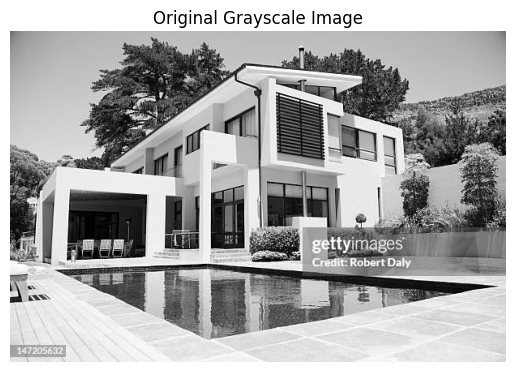

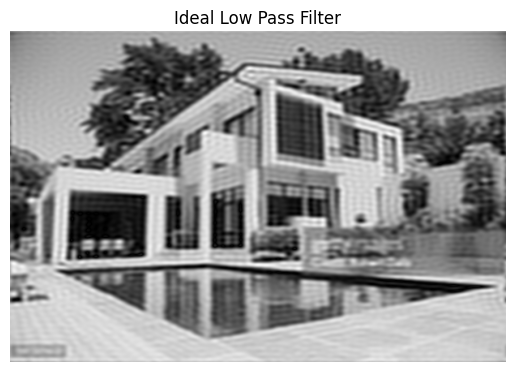

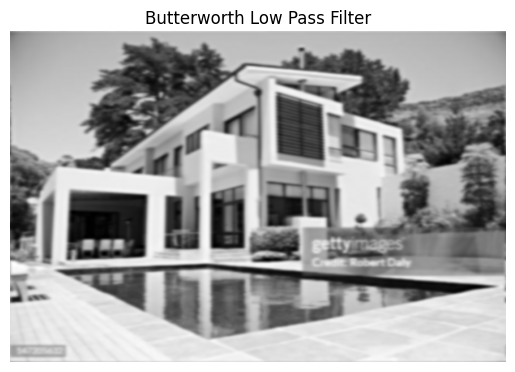

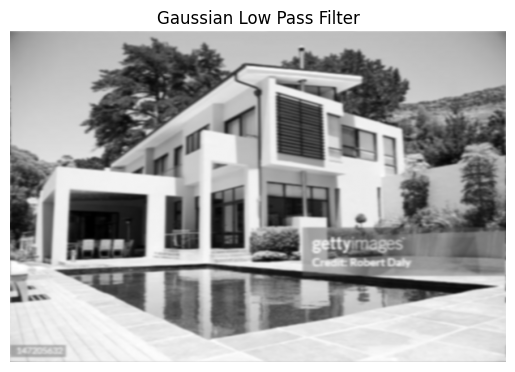

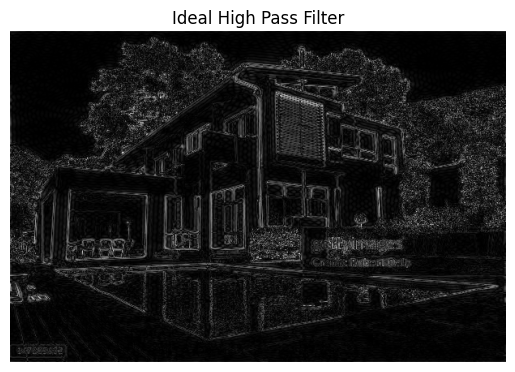

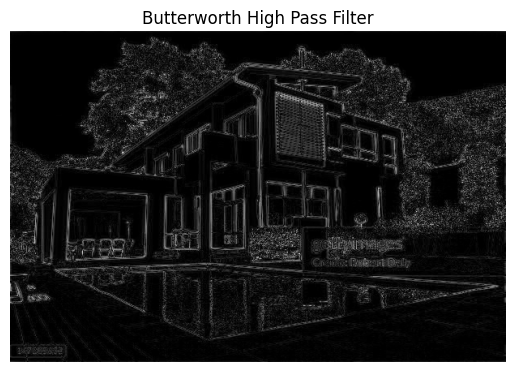

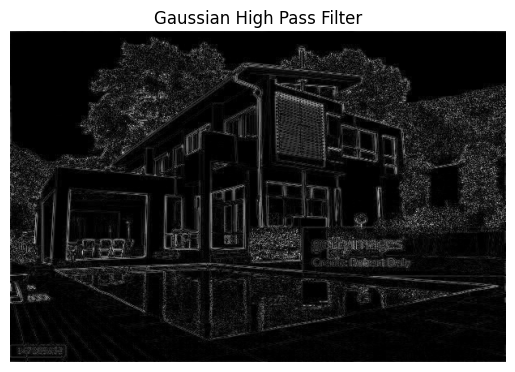

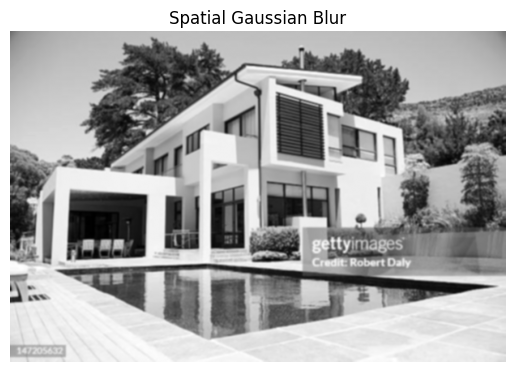

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_image(image_path):
    """Load the image and convert it to grayscale."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

def compute_fft(image):
    """Compute the 2D Fourier Transform of the image."""
    return np.fft.fftshift(np.fft.fft2(image))

def create_lpf_ideal(shape, cutoff):
    """Create an Ideal Low Pass Filter mask."""
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), cutoff, 1, thickness=-1)
    return mask

def create_lpf_butterworth(shape, cutoff, order=2):
    """Create a Butterworth Low Pass Filter mask."""
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x = np.arange(0, rows).reshape(rows, 1)
    y = np.arange(0, cols)
    d = np.sqrt((x - crow) ** 2 + (y - ccol) ** 2)
    mask = 1 / (1 + (d / cutoff) ** (2 * order))
    return mask

def create_lpf_gaussian(shape, cutoff):
    """Create a Gaussian Low Pass Filter mask."""
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x = np.arange(0, cols)
    y = np.arange(0, rows).reshape(rows, 1)
    d = np.sqrt((x - ccol) ** 2 + (y - crow) ** 2)
    mask = np.exp(-(d ** 2) / (2 * (cutoff ** 2)))
    return mask

def create_hpf_ideal(shape, cutoff):
    """Create an Ideal High Pass Filter mask."""
    return 1 - create_lpf_ideal(shape, cutoff)

def create_hpf_butterworth(shape, cutoff, order=2):
    """Create a Butterworth High Pass Filter mask."""
    return 1 - create_lpf_butterworth(shape, cutoff, order)

def create_hpf_gaussian(shape, cutoff):
    """Create a Gaussian High Pass Filter mask."""
    return 1 - create_lpf_gaussian(shape, cutoff)

def apply_filter(image, filter_mask):
    """Apply the filter in the frequency domain and perform Inverse FFT."""
    fft_image = compute_fft(image)
    filtered_fft = fft_image * filter_mask
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_fft))
    return np.abs(filtered_image)

def display_image(image, title):
    """Display the image with a title."""
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Main execution
image_path = '/content/building.jpg'  # Path to the image
image = load_image(image_path)

# Display Original Image
display_image(image, 'Original Grayscale Image')

# Performing Low Pass Filter (LPF) operations
cutoff_value = 60  # Change this value to observe effects

# Ideal LPF
lpf_ideal_mask = create_lpf_ideal(image.shape, cutoff_value)
filtered_image_ideal_lpf = apply_filter(image, lpf_ideal_mask)
display_image(filtered_image_ideal_lpf, 'Ideal Low Pass Filter')

# Butterworth LPF
lpf_butterworth_mask = create_lpf_butterworth(image.shape, cutoff_value)
filtered_image_butterworth_lpf = apply_filter(image, lpf_butterworth_mask)
display_image(filtered_image_butterworth_lpf, 'Butterworth Low Pass Filter')

# Gaussian LPF
lpf_gaussian_mask = create_lpf_gaussian(image.shape, cutoff_value)
filtered_image_gaussian_lpf = apply_filter(image, lpf_gaussian_mask)
display_image(filtered_image_gaussian_lpf, 'Gaussian Low Pass Filter')

# Now performing High Pass Filter (HPF) operations

# Ideal HPF
hpf_ideal_mask = create_hpf_ideal(image.shape, cutoff_value)
filtered_image_ideal_hpf = apply_filter(image, hpf_ideal_mask)
display_image(filtered_image_ideal_hpf, 'Ideal High Pass Filter')

# Butterworth HPF
hpf_butterworth_mask = create_hpf_butterworth(image.shape, cutoff_value)
filtered_image_butterworth_hpf = apply_filter(image, hpf_butterworth_mask)
display_image(filtered_image_butterworth_hpf, 'Butterworth High Pass Filter')

# Gaussian HPF
hpf_gaussian_mask = create_hpf_gaussian(image.shape, cutoff_value)
filtered_image_gaussian_hpf = apply_filter(image, hpf_gaussian_mask)
display_image(filtered_image_gaussian_hpf, 'Gaussian High Pass Filter')

# Comparison: Spatial Filtering

# Spatial Gaussian Blur
spatial_filtered_image = cv2.GaussianBlur(image, (5, 5), 0)  # kernel size (5,5)
display_image(spatial_filtered_image, 'Spatial Gaussian Blur')